In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
from scipy.stats import norm


In [2]:
# Create reference to CSV file
#csv_path = "../Resources/Metro_Interstate_Traffic_Volume.csv"
csv_path = "Metro_Interstate_Traffic_Volume.csv"
# Import the CSV into a pandas DataFrame
Traffic_Volume_df = pd.read_csv(csv_path)
Traffic_Volume_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
Traffic_Volume_df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [4]:
#convert date_time to datetime
Traffic_Volume_df['date_time'] = pd.to_datetime(Traffic_Volume_df['date_time'])
Traffic_Volume_df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

In [5]:
#Convet Kelvin to Fahrenheit
#Run only once, if you see -ve values in temp, refresh df.

def Kel_to_Far(x):
    return(x - 273.15) * 9/5 + 32

Traffic_Volume_df['temp']=Traffic_Volume_df['temp'].apply(lambda x : Kel_to_Far(x))
Traffic_Volume_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
#idetify incomplete rows
Traffic_Volume_df.count()

holiday                   61
temp                   48204
rain_1h                48204
snow_1h                48204
clouds_all             48204
weather_main           48204
weather_description    48204
date_time              48204
traffic_volume         48204
dtype: int64

Holidy count shows 61, indicates 48204-61 = 48143 are non-holidays.
Need to replace Null values in holiyday column to NonHoliday

In [7]:
#Replace Null values to NonHoliday
#Traffic_Volume_df['holiday'] = Traffic_Volume_df['holiday'].replace({'NaN': 'NonHoliday'})
Traffic_Volume_df['holiday'].fillna('NonHoliday',inplace=True)
Traffic_Volume_df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NonHoliday,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NonHoliday,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NonHoliday,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NonHoliday,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NonHoliday,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
#Check if NaNs are replaced with NonHoliday
Traffic_Volume_df.count()

holiday                48204
temp                   48204
rain_1h                48204
snow_1h                48204
clouds_all             48204
weather_main           48204
weather_description    48204
date_time              48204
traffic_volume         48204
dtype: int64

In [9]:
# Collect a list of all the unique values in "holiday"
Traffic_Volume_df["holiday"].unique()

array(['NonHoliday', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [10]:
# Collect a list of all the unique values in "weather_description"
Traffic_Volume_df["weather_description"].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

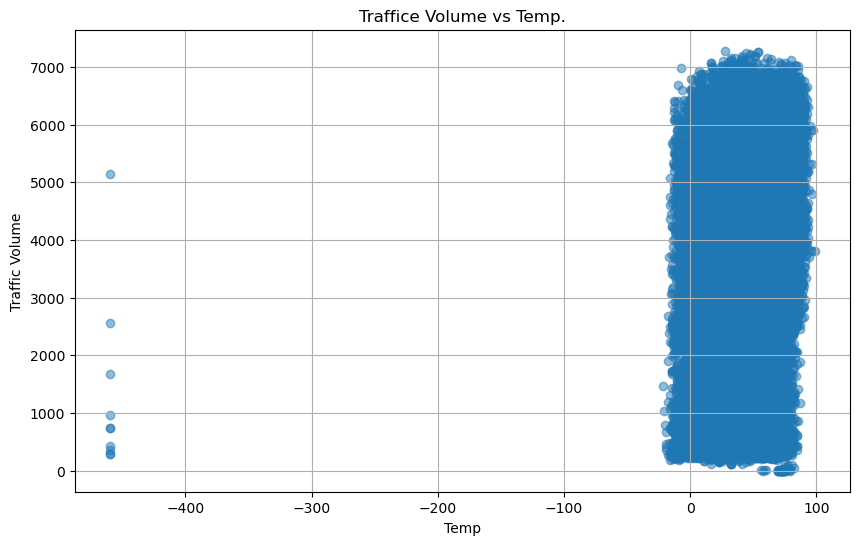

In [12]:
#Scatter plot of temp
plt.figure(figsize=(10,6))
plt.scatter(Traffic_Volume_df['temp'], Traffic_Volume_df['traffic_volume'], alpha=0.5)
plt.title('Traffice Volume vs Temp.')
plt.xlabel('Temp')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

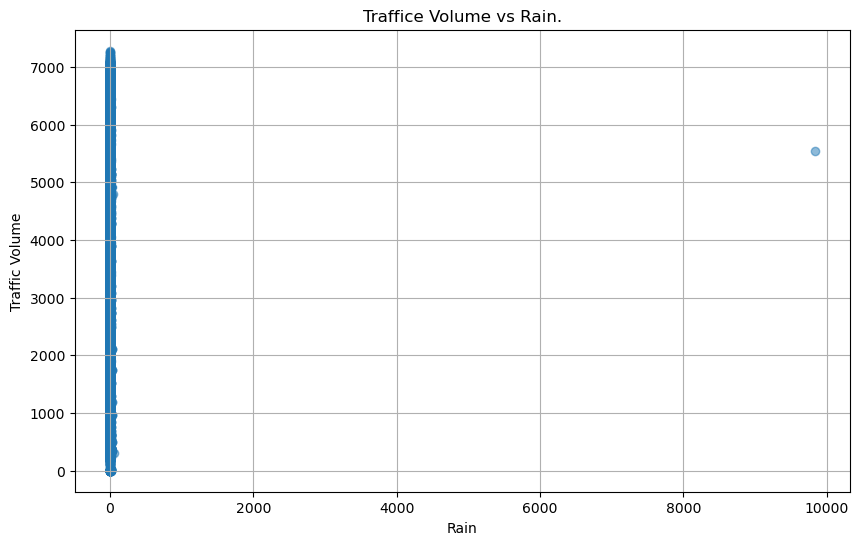

In [13]:
#Scatter plot of Rain
plt.figure(figsize=(10,6))
plt.scatter(Traffic_Volume_df['rain_1h'], Traffic_Volume_df['traffic_volume'], alpha=0.5)
plt.title('Traffice Volume vs Rain.')
plt.xlabel('Rain')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

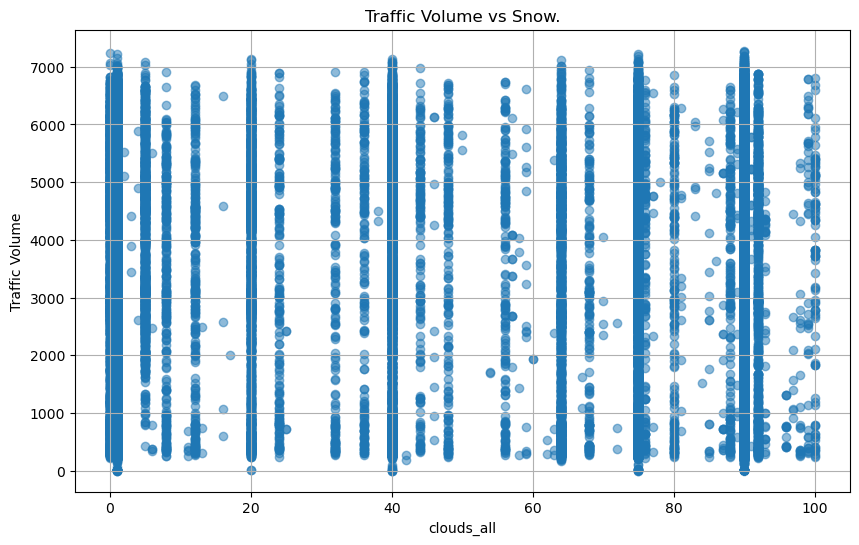

In [48]:
#Scatter plot of Cloud
plt.figure(figsize=(10,6))
plt.scatter(Traffic_Volume_df['clouds_all'], Traffic_Volume_df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume vs Snow.')
plt.xlabel('clouds_all')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

In [14]:
#Outlier : Remove rows with temp > -50
Traffic_Volume_df = Traffic_Volume_df[Traffic_Volume_df['temp'] > -50]

In [15]:
#Oulier: Remove rows with rain <407 mm
Traffic_Volume_df = Traffic_Volume_df[Traffic_Volume_df['rain_1h'] < 407]

In [16]:
Traffic_Volume_df.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,48193.000000,48193.000000,48193.000000,48193.000000,48193,48193.000000
mean,46.604816,0.130342,0.000222,49.371942,2016-01-05 14:10:43.238644480,3260.174029
min,-21.568000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,30.254000,0.000000,0.000000,1.000000,2014-02-06 19:00:00,1194.000000
50%,48.758000,0.000000,0.000000,64.000000,2016-06-11 08:00:00,3380.000000
75%,65.588000,0.000000,0.000000,90.000000,2017-08-11 07:00:00,4933.000000
max,98.456000,55.630000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000
std,22.876855,1.003480,0.008169,39.013548,NaN,1986.754010


In [17]:
#display max value from each column
#If DF contains numberical value, it will show maximum numerical value from the coulumn
#If DF contains non-numeric value(like strings), it will show maximum value based on lexicographical order (i.e the last value alphabetically)
Traffic_Volume_df.max()

holiday                Washingtons Birthday
temp                                 98.456
rain_1h                               55.63
snow_1h                                0.51
clouds_all                              100
weather_main                   Thunderstorm
weather_description         very heavy rain
date_time               2018-09-30 23:00:00
traffic_volume                         7280
dtype: object

In [18]:
#display min value from each column
#If DF contains numberical value, it will show maximum numerical value from the coulumn
#If DF contains non-numeric value(like strings), it will show maximum value based on lexicographical order (i.e the last value alphabetically)
Traffic_Volume_df.min()

holiday                      Christmas Day
temp                               -21.568
rain_1h                                0.0
snow_1h                                0.0
clouds_all                               0
weather_main                         Clear
weather_description                SQUALLS
date_time              2012-10-02 09:00:00
traffic_volume                           0
dtype: object

In [19]:
#Display information when traffic volume is  max
max_traffic_volume_index = Traffic_Volume_df['traffic_volume'].idxmax()
#print(max_traffic_volume_index)
max_traffice_volume_row = Traffic_Volume_df.loc[max_traffic_volume_index,:]


print ( "Diplay information when Traffic_Volume was maximum")
print(max_traffice_volume_row)


Diplay information when Traffic_Volume was maximum
holiday                         NonHoliday
temp                                 27.68
rain_1h                                0.0
snow_1h                                0.0
clouds_all                              90
weather_main                        Clouds
weather_description        overcast clouds
date_time              2017-03-09 16:00:00
traffic_volume                        7280
Name: 31615, dtype: object


In [20]:
#Display information when traffic volume is  max
min_traffic_volume_index = Traffic_Volume_df['traffic_volume'].idxmin()
#print(max_traffic_volume_index)
min_traffice_volume_row = Traffic_Volume_df.loc[min_traffic_volume_index,:]


print ( "Diplay information when Traffic_Volume was minimum")
print(min_traffice_volume_row)

Diplay information when Traffic_Volume was minimum
holiday                         NonHoliday
temp                                74.354
rain_1h                                0.0
snow_1h                                0.0
clouds_all                              40
weather_main                          Rain
weather_description             light rain
date_time              2016-07-23 18:00:00
traffic_volume                           0
Name: 25186, dtype: object


In [22]:
# Calculate the measures of central tendency

mean_numpy = np.mean(Traffic_Volume_df['traffic_volume'])
print("The mean Traffic Volume is :", format(mean_numpy,".2f"))

median_numpy = np.median(Traffic_Volume_df['traffic_volume'])
print(f"The median Traffic Volume is :", format(median_numpy,".2f"))


mode_scipy = sts.mode(Traffic_Volume_df['traffic_volume'])
print(f"The mode Traffic Volume is {mode_scipy}")


The mean Traffic Volume is : 3260.17
The median Traffic Volume is : 3380.00
The mode Traffic Volume is ModeResult(mode=353, count=50)


c:\Users\rajeev_daithankar\AppData\Local\Continuum\anaconda3\envs\dev_boot\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


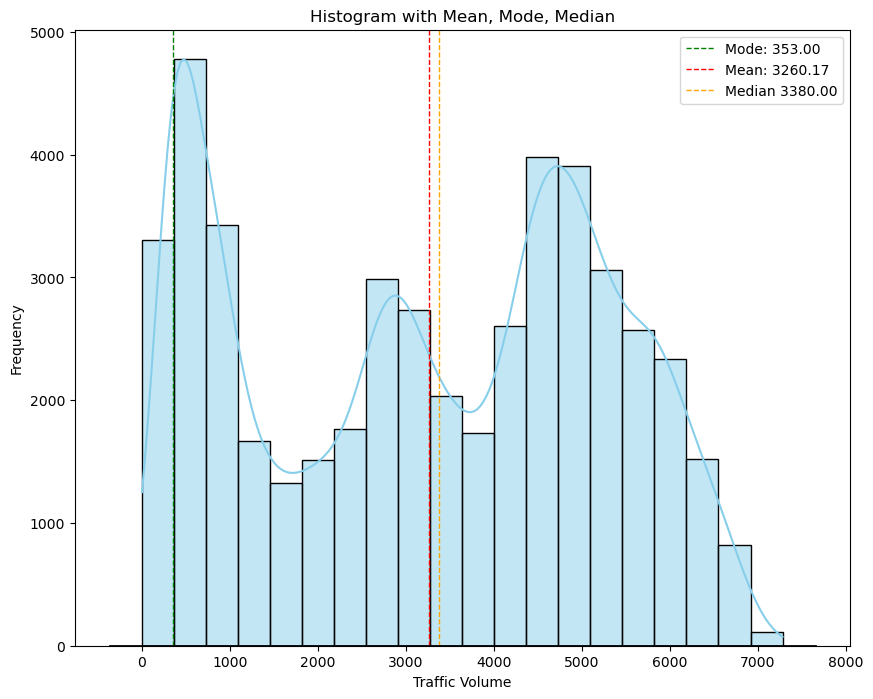

In [23]:
#Histogram for Mean, Median, Mode
mean_value =  Traffic_Volume_df['traffic_volume'].mean()
mode_value = Traffic_Volume_df['traffic_volume'].mode()[0]
median_value = Traffic_Volume_df['traffic_volume'].median()

#plot histogram with Kernel Denstiy Estimate
plt.figure(figsize=(10,8))
sns.histplot(Traffic_Volume_df['traffic_volume'], kde=True, color='skyblue', bins=20)


plt.axvline(mode_value, color='green', linestyle ='dashed', linewidth = 1, label = f'Mode: {mode_value:.2f}')
plt.axvline(mean_value, color='red', linestyle ='dashed', linewidth = 1, label = f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='orange', linestyle ='dashed', linewidth = 1, label = f'Median {median_value:.2f}')

#Add legend
plt.legend()
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Histogram with Mean, Mode, Median')

#Add distributin curve
xmin, xmax = plt.xlim()
x= np.linspace(xmin, xmax, 100)
p=norm.pdf(x, mean_value,Traffic_Volume_df['traffic_volume'].std())
plt.plot(x,p, 'k', linewidth =2)
plt.show()

**Central Tendency**
Central tendency is defined as “the statistical measure that identifies a single value as representative of an entire distribution. It aims to provide an accurate description of the entire data. It is the single value that is most typical/representative of the collected data. 
It lets us know what is normal or 'average' for a set of data. It also condenses the data set down to one representative value, which is useful when you are working with large amounts of data.

Mode: The mode is the most frequently occurring value in the dataset

Median : The median of a dataset is the value that’s exactly in the middle when it is ordered from low to high.

Median of an odd-numbered dataset
For an odd-numbered dataset, find the value that lies at the (n+1)/2 position, where n is the number of values in the dataset.

Median of an even-numbered dataset
For an even-numbered dataset, find the two values in the middle of the dataset: the values at the n/2 and n/2+1 positions. Then, find their mean.

Mean: The arithmetic mean of a dataset (which is different from the geometric mean) is the sum of all values divided by the total number of values.

Distribution : 
If the mean is approximately equal to the median, the distributionis symmetrical
if the mean is greater than the median, the distributino is positively skewed.
If the mean is less that the media, the distribution is negative skewed.

For this dataset:
The mode is significantly lower than both the mean and median, indicating that there is a peak towards lower end of distibution.

In this case, the distribution is negative skewed as mean (3259.82) is less than median(3380.00). This means that the tail of the distribution extends towards lower values, while bulk of data is concentrated towards higher values.



In [24]:
#calulate range of traffic_volume
range_traffic_volume = Traffic_Volume_df['traffic_volume'].max() - Traffic_Volume_df['traffic_volume'].min()
print("The max value of Traffic Volume is : ", Traffic_Volume_df['traffic_volume'].max())
print("The min value of Traffic Volume is : ", Traffic_Volume_df['traffic_volume'].min())
print("The range of Traffic Volume is : ", range_traffic_volume)

The max value of Traffic Volume is :  7280
The min value of Traffic Volume is :  0
The range of Traffic Volume is :  7280


In [25]:
# Calculate variance and standard deviation using NumPy
variance = np.var(Traffic_Volume_df['traffic_volume'])
print("The population variance  is : ", format(variance,".2f"))

stand_dev = np.std(Traffic_Volume_df['traffic_volume'])
print(f"The population standard deviation is : ", format(stand_dev,".2f"))

The population variance  is :  3947109.59
The population standard deviation is :  1986.73


In [27]:
# Find potential outliers by calculating the interquartile range (IQR)
Q1 = Traffic_Volume_df['traffic_volume'].quantile(0.25)
median = Traffic_Volume_df['traffic_volume'].quantile(0.5)
Q3 = Traffic_Volume_df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1

print(f"The lower quartile of Traffice Volume Q1 is : {Q1}")
print(f"The upper quartile of Traffice Volume Q3 is: {Q3}")
print(f"The interquartile range of Traffic Volume  IQR is: {IQR}")
print(f"The the median of temperTraffic Volume is: {median} ")

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Traffice Volume Q1 is : 1194.0
The upper quartile of Traffice Volume Q3 is: 4933.0
The interquartile range of Traffic Volume  IQR is: 3739.0
The the median of temperTraffic Volume is: 3380.0 
Values below -4414.5 could be outliers.
Values above 10541.5 could be outliers.


In [28]:
# Create a DataFrame of rows that could be outliers
outlier_df = Traffic_Volume_df.loc[(Traffic_Volume_df['traffic_volume'] < - 4417.0) |
                                (Traffic_Volume_df['traffic_volume'] > 10543.0 )]
outlier_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume


In [29]:
# How many potential outliers are there in the dataset?
len(outlier_df)

0

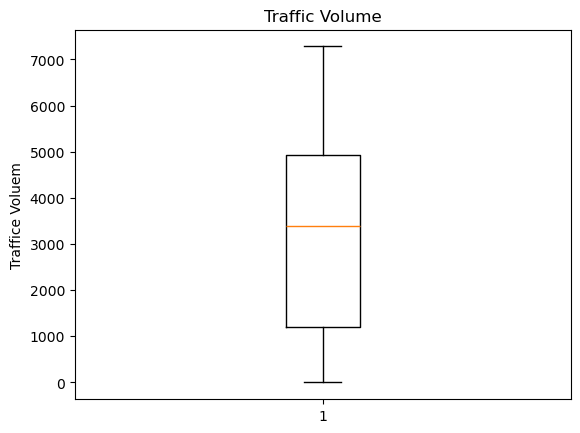

In [31]:
#Box plot to find any outliers
Traffic_volume_outlier = Traffic_Volume_df['traffic_volume']
fig1, ax1 = plt.subplots()
ax1.set_title('Traffic Volume')
ax1.set_ylabel('Traffice Voluem')
ax1.boxplot(Traffic_volume_outlier)
plt.show()

**Measures of Dispersion**

--**Range** is difference between largest and smallest values in dataset. Range provides quick indication of variablity or spread of data points. It is sensitive to outliers.


--**Variance** is the average  of squared differences from the mean Variance is measure of spread of data points around the mean. Ahigher varaince indicates that the data points are more spread around the mean, while lower vairance suggests that the data points are closer to mean.

--**Stanard Deviation** is square root of variance. A higher Std. Dev. indicates greater vairablity in dataset,  a lower std. dev. suggests that data points are closer to mean.

--**Interquartile Range (IQR)** IT is a measure of statistical dispersion (spred of data set)
IQR  = Q3 -Q1

    The first quartile (Q1) - It represents 25th percentile of the data.

    The third quartile (Q3) - It represents 75th percentile of the data.
IQR is amount of spread in the middle 50% of dataset. It is robust against outliers.


This dataset shows that there is high degree of variablity or scatter of data points around the mean



**Mean and Std. Deviation**
Mean of traffic volme is 3259.82 (SD=1986.84)
SD of 1986.84 indicates how much variation there is from mean 3259.82

Interpretation:
1. Large SD indicates that data points are spread out widely around mean.
2. Mean is greater that SD, implies that there is significant variability or dispersion in dataset, with data points scatterd over a wide range.


In [32]:
# Calculate z-scores using SciPy
z_scipy = sts.zscore(Traffic_volume_outlier)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 0        1.150042
1        0.632106
2        0.758444
3        0.888809
4        0.834448
           ...   
48199    0.142357
48200   -0.241187
48201   -0.554264
48202   -0.911131
48203   -1.160787
Name: traffic_volume, Length: 48193, dtype: float64


<placehoder of z-score explanatino>

Placehlder of zScore interpretation

<Placeholder for zscore explanation>

Corrleation Matrix
                traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.132258 -0.022382  0.000729    0.066804
temp                  0.132258  1.000000  0.089920 -0.020859   -0.112885
rain_1h              -0.022382  0.089920  1.000000  0.001524    0.081485
snow_1h               0.000729 -0.020859  0.001524  1.000000    0.027929
clouds_all            0.066804 -0.112885  0.081485  0.027929    1.000000


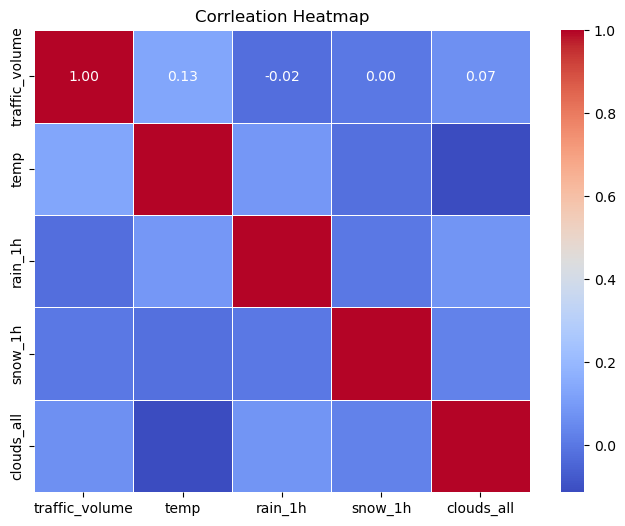


 Correlation Coefficients
Traffic Volume vs Temp 0.13
Traffic Volume vs rain -0.02
Traffic Volume vs Snow Fall 0.00
Traffic Volume vs Clouds 0.07


In [34]:
#import seaborn as sns

#Calulate Correlation Matrix
subset_df = Traffic_Volume_df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
correlation_matrix = subset_df.corr()
#print correlation matrix
print("Corrleation Matrix")
print (correlation_matrix)

#plot correlation heatmap
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)

#heatmap.set_aspect('equal', adjustable ='box')

plt.title("Corrleation Heatmap")
plt.show()

# #Print Corrleation coefficients
print("\n Correlation Coefficients")
print("Traffic Volume vs Temp", "{:.2f}".format(correlation_matrix.loc['traffic_volume', 'temp']))
print("Traffic Volume vs rain","{:.2f}".format (correlation_matrix.loc['traffic_volume', 'rain_1h']))
print("Traffic Volume vs Snow Fall", "{:.2f}".format(correlation_matrix.loc['traffic_volume', 'snow_1h']))
print("Traffic Volume vs Clouds", "{:.2f}".format(correlation_matrix.loc['traffic_volume', 'clouds_all']))

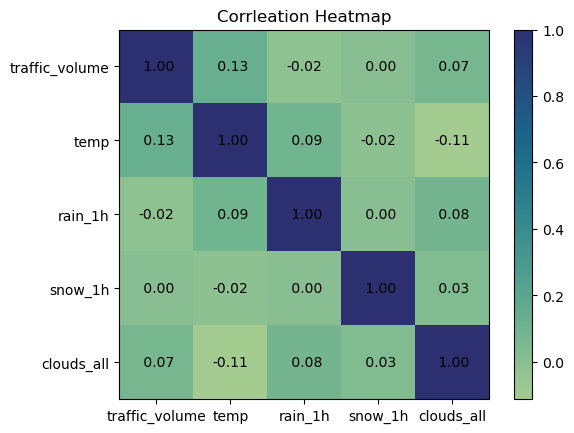

In [35]:
# heatmap using matplotlib
plt.Figure(figsize=(10,8))
plt.imshow(correlation_matrix, cmap='crest', interpolation='nearest')

#Annotation
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j,i, f"{correlation_matrix.iloc[i,j]: .2f}", ha='center', va='center', color ='black')
plt.colorbar()
plt.title('Corrleation Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

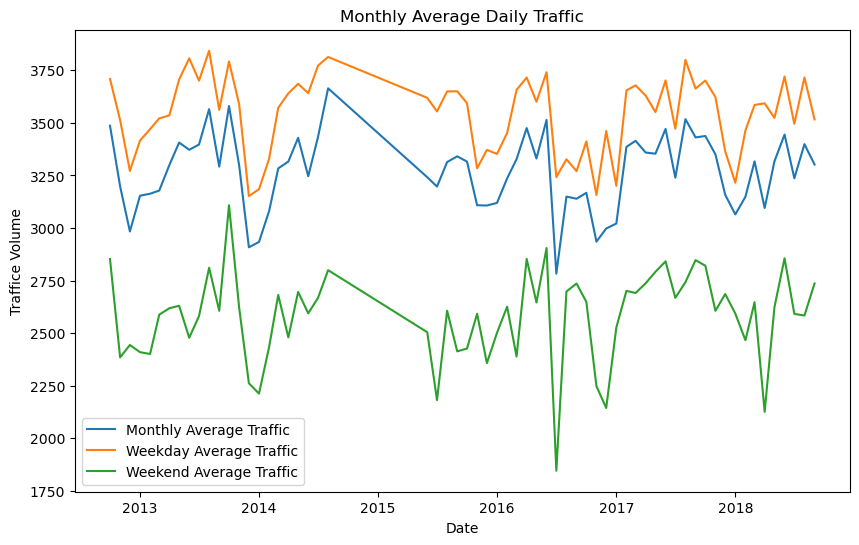

In [36]:
#Monthly Average Daily Traffic

#Extract day of the week
#Monday =0, Sunday =6 
Traffic_Volume_df['day_of_week'] = Traffic_Volume_df['date_time'].dt.day_of_week

#Group data by month and calculate average daily traffic

monthly_avg_traffic = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['traffic_volume'].mean()

#Separate data for weekdays and weekends
weekdays_data = Traffic_Volume_df[Traffic_Volume_df['day_of_week']<5]  #Weekdays Monday to Friday
weekends_data = Traffic_Volume_df[Traffic_Volume_df['day_of_week']>=5] #Weekends Saturday to Sunday

#Group Weekday and Weekend data  by month and calulate average daily traffic
weekday_avg_traffic = weekdays_data.groupby(weekdays_data['date_time'].dt.to_period('M'))['traffic_volume'].mean()
weekend_avg_traffic = weekends_data.groupby(weekends_data['date_time'].dt.to_period('M'))['traffic_volume'].mean()


# Plot graphs
plt.figure(figsize=(10,6))

#Monthly average daily traffic

plt.plot(monthly_avg_traffic.index.to_timestamp(), monthly_avg_traffic, label='Monthly Average Traffic')

#Weekday average daily traffic

plt.plot(weekday_avg_traffic.index.to_timestamp(), weekday_avg_traffic, label='Weekday Average Traffic')

#Weekend average daily traffic

plt.plot(weekend_avg_traffic.index.to_timestamp(), weekend_avg_traffic, label='Weekend Average Traffic')

plt.xlabel('Date')
plt.ylabel('Traffice Volume')
plt.title('Monthly Average Daily Traffic')

plt.legend()

plt.show()


In [37]:
print(monthly_avg_traffic)

date_time
2012-10    3486.740373
2012-11    3198.431847
2012-12    2983.665635
2013-01    3153.654391
2013-02    3163.216179
              ...     
2018-05    3317.254879
2018-06    3444.641876
2018-07    3236.646651
2018-08    3398.878436
2018-09    3302.213904
Freq: M, Name: traffic_volume, Length: 63, dtype: float64


In [38]:
print (weekday_avg_traffic)

date_time
2012-10    3709.088926
2012-11    3513.378092
2012-12    3271.580696
2013-01    3415.963602
2013-02    3470.579256
              ...     
2018-05    3524.007452
2018-06    3720.665546
2018-07    3495.550162
2018-08    3716.049927
2018-09    3516.737463
Freq: M, Name: traffic_volume, Length: 63, dtype: float64


In [39]:
print (weekend_avg_traffic)

date_time
2012-10    2852.674641
2012-11    2384.461187
2012-12    2443.718101
2013-01    2409.494565
2013-02    2400.776699
              ...     
2018-05    2623.600000
2018-06    2855.989247
2018-07    2591.475806
2018-08    2583.807547
2018-09    2736.272374
Freq: M, Name: traffic_volume, Length: 63, dtype: float64


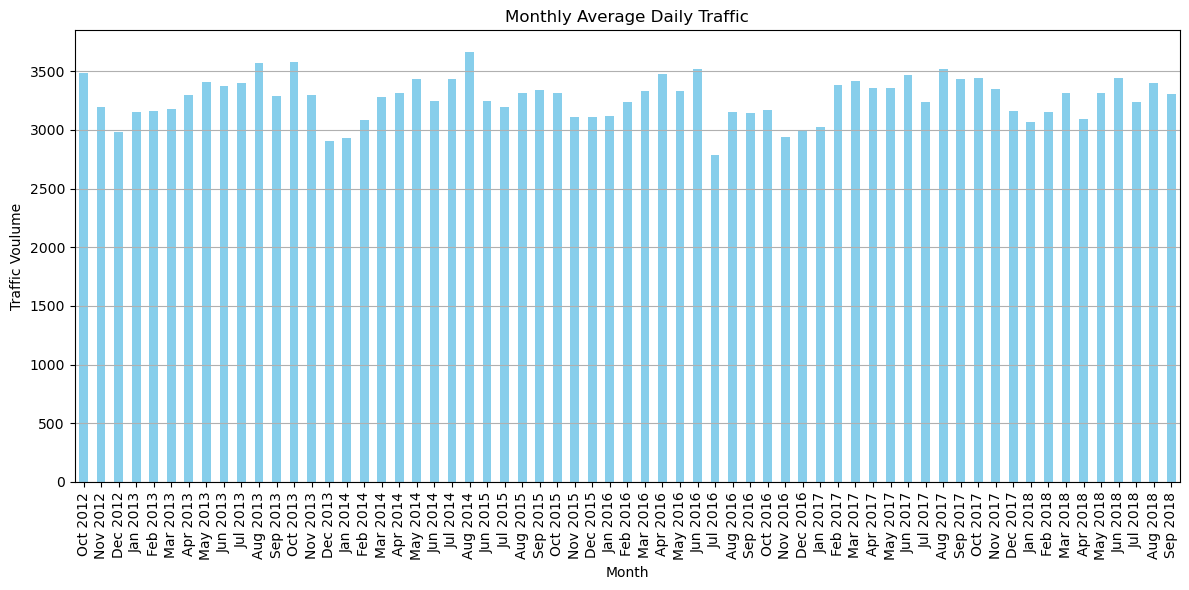

In [40]:
#plot bar chart - Monthly average
plt.figure(figsize=(12,6))
monthly_avg_traffic.plot(kind='bar', color='skyblue')

# Add data labels to bar chart
# for month, avg_traffic in zip(monthly_avg_traffic.index, monthly_avg_traffic):
#     plt.text(month.to_timestamp(), avg_traffic, f'{avg_traffic:.2f}', ha='center', va='bottom')

#titles and labels
plt.title ("Monthly Average Daily Traffic")
plt.xlabel('Month')
plt.ylabel('Traffic Voulume')
plt.xticks(range(len(monthly_avg_traffic.index)), monthly_avg_traffic.index.strftime('%b %Y'),rotation=90)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


In [41]:
#Test with excel sheet
Sept_2018_traffic = Traffic_Volume_df[Traffic_Volume_df['date_time'].dt.to_period('M')=='2018-09']
avg_Sept_2018_traffic = Sept_2018_traffic['traffic_volume'].mean()
avg_Sept_2018_traffic

3302.2139037433153

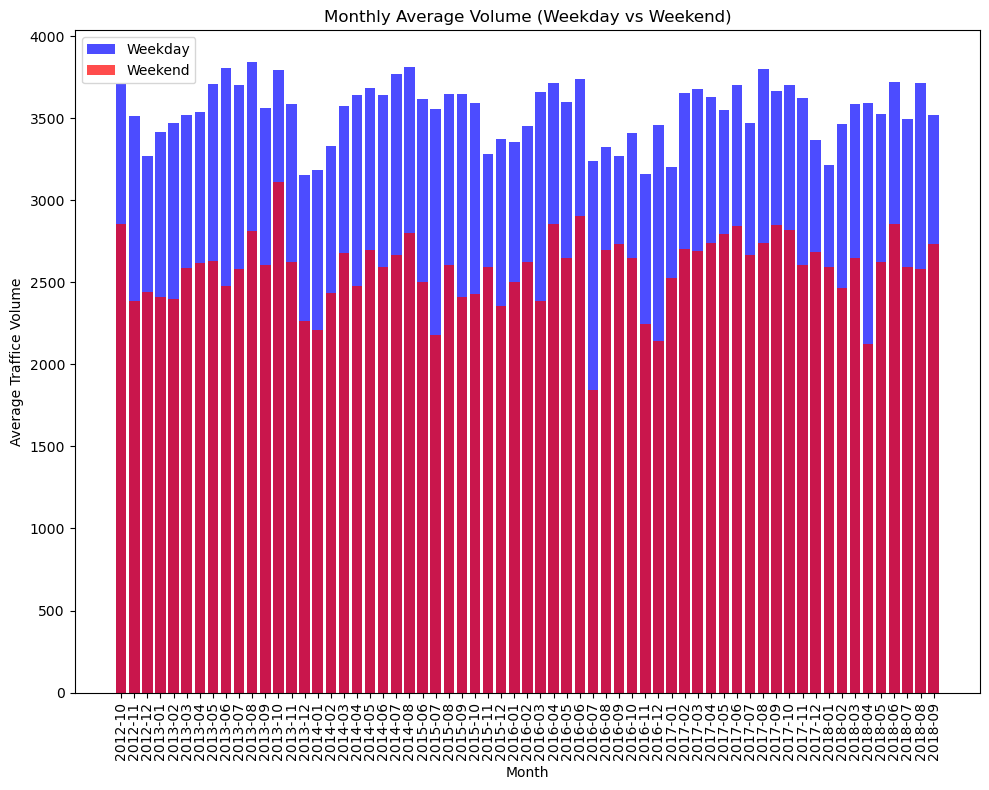

In [42]:
#weeKday and Weekend average monthtly
plt.figure(figsize=(10,8))
plt.bar(weekday_avg_traffic.index.astype(str), weekday_avg_traffic, label='Weekday', color = 'b', alpha=0.7)
plt.bar(weekend_avg_traffic.index.astype(str), weekend_avg_traffic, label='Weekend', color = 'r', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average Traffice Volume')
plt.title('Monthly Average Volume (Weekday vs Weekend)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
Traffic_Volume_df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
day_of_week                     int32
dtype: object

In [44]:
Traffic_Volume_df.reset_index(inplace=True)
Traffic_Volume_df

,index,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day_of_week
0,0,NonHoliday,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1
1,1,NonHoliday,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1
2,2,NonHoliday,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1
3,3,NonHoliday,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1
4,4,NonHoliday,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1
...,...,...,...,...,...,...,...,...,...,...,...
48188,48199,NonHoliday,50.540,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6
48189,48200,NonHoliday,49.298,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6
48190,48201,NonHoliday,49.244,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6
48191,48202,NonHoliday,48.092,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6


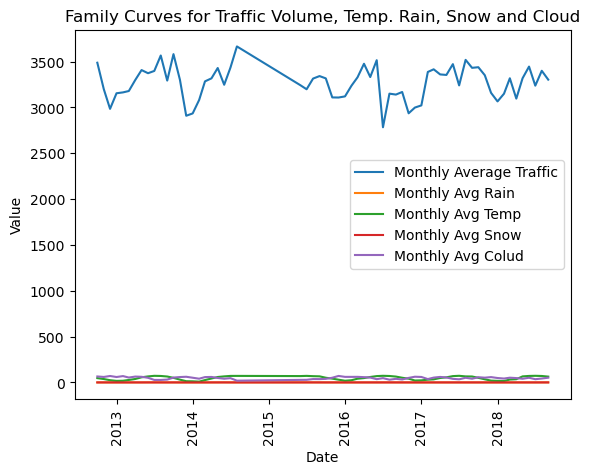

In [45]:
#Family Curves of for Rain, Temp, Snow, Cloud

Traffic_Volume_df['date_time'] = pd.to_datetime(Traffic_Volume_df['date_time'])
monthly_avg_traffic = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['traffic_volume'].mean()
plt.plot(monthly_avg_traffic.index.to_timestamp(), monthly_avg_traffic, label='Monthly Average Traffic')

monthly_avg_rain = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['rain_1h'].mean()
plt.plot(monthly_avg_rain.index.to_timestamp(), monthly_avg_rain, label='Monthly Avg Rain')

monthly_avg_temp = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['temp'].mean()
plt.plot(monthly_avg_temp.index.to_timestamp(), monthly_avg_temp, label='Monthly Avg Temp')

monthly_avg_snow = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['snow_1h'].mean()
plt.plot(monthly_avg_snow.index.to_timestamp(), monthly_avg_snow, label='Monthly Avg Snow')

monthly_avg_cloud = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['clouds_all'].mean()
plt.plot(monthly_avg_cloud.index.to_timestamp(), monthly_avg_cloud, label='Monthly Avg Colud')

# #Group by month and calculate mean for each group
# monthly_avg = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M')).mean()

# #plot temp.
# plt.plot(monthly_avg['date_time'], monthly_avg['temp'], label='Temperature')

# #plot rain
# plt.plot(monthly_avg['date_time'], monthly_avg['rain_1h'], label='Rain')

# #plot snow
# plt.plot(monthly_avg['date_time'], monthly_avg['snow_1h'], label='Snow')

# #plot traffic volume
# plt.plot(monthly_avg['date_time'], monthly_avg['traffic_volume'], label='Traffic Volume')

#Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Family Curves for Traffic Volume, Temp. Rain, Snow and Cloud')
plt.legend()
plt.xticks(rotation=90)

#Show plot
plt.show()

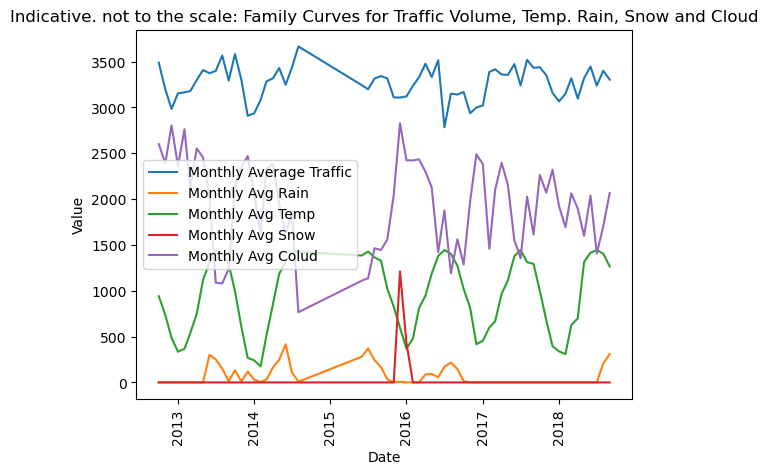

In [46]:
#Family of curnves zoomed out for Rain, Temp, Snow, Cloud for study

Traffic_Volume_df['date_time'] = pd.to_datetime(Traffic_Volume_df['date_time'])
monthly_avg_traffic = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['traffic_volume'].mean()
plt.plot(monthly_avg_traffic.index.to_timestamp(), monthly_avg_traffic, label='Monthly Average Traffic')

monthly_avg_rain = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['rain_1h'].mean()
plt.plot(monthly_avg_rain.index.to_timestamp(), monthly_avg_rain*500, label='Monthly Avg Rain')

monthly_avg_temp = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['temp'].mean()
plt.plot(monthly_avg_temp.index.to_timestamp(), monthly_avg_temp*20, label='Monthly Avg Temp')

monthly_avg_snow = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['snow_1h'].mean()
plt.plot(monthly_avg_snow.index.to_timestamp(), monthly_avg_snow*90000, label='Monthly Avg Snow')

monthly_avg_cloud = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['clouds_all'].mean()
plt.plot(monthly_avg_cloud.index.to_timestamp(), monthly_avg_cloud*40, label='Monthly Avg Colud')

# #Group by month and calculate mean for each group
# monthly_avg = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M')).mean()

# #plot temp.
# plt.plot(monthly_avg['date_time'], monthly_avg['temp'], label='Temperature')

# #plot rain
# plt.plot(monthly_avg['date_time'], monthly_avg['rain_1h'], label='Rain')

# #plot snow
# plt.plot(monthly_avg['date_time'], monthly_avg['snow_1h'], label='Snow')

# #plot traffic volume
# plt.plot(monthly_avg['date_time'], monthly_avg['traffic_volume'], label='Traffic Volume')

#Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Indicative. not to the scale: Family Curves for Traffic Volume, Temp. Rain, Snow and Cloud')
plt.legend()
plt.xticks(rotation=90)

#Show plot
plt.show()


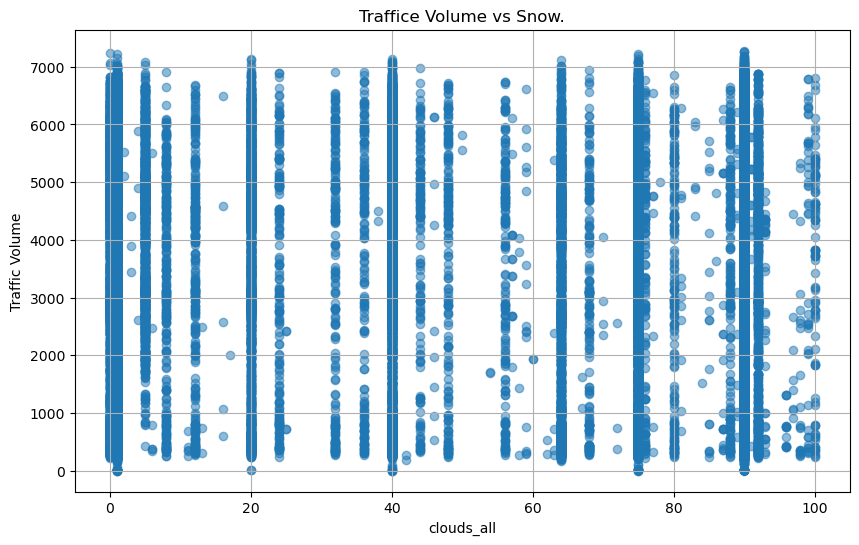

In [40]:
#Scatter plot of Cloud
plt.figure(figsize=(10,6))
plt.scatter(Traffic_Volume_df['clouds_all'], Traffic_Volume_df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume vs Snow.')
plt.xlabel('clouds_all')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

In [ ]:
#WIP

The z-scores using the SciPy module are 0        1.150159
1        0.632251
2        0.758582
3        0.888940
4        0.834582
           ...   
48199    0.142529
48200   -0.240995
48201   -0.554055
48202   -0.910903
48203   -1.160546
Name: traffic_volume, Length: 48204, dtype: float64


In [ ]:
# Add the z-scores to the original DataFrame as a new column
# Traffic_Volume_df["z_score"] = z_scipy
# Traffic_Volume_df.head()